In [34]:
# import libraries

import altair as alt
import pandas as pd

In [35]:
# it just needs to be here so we can work with big files 

alt.data_transformers.enable('default', max_rows=None) 
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [36]:
df = pd.read_csv('https://gist.githubusercontent.com/andriy-gazin/ba80540e622b6e01b098ec623af236b1/raw/93be913d9891ec8b71ddce15ae81fb7321a063b7/wbdata.csv')
df.head()

,country,continent,year,gdpPerCap,lifeExp,pop
0,Qatar,Asia,2017,124609.304140,79.981000,2724724
1,Luxembourg,Europe,2017,107640.559218,82.685366,596336
2,Singapore,Asia,2017,96552.602608,82.895122,5612253
3,Brunei,Asia,2017,79789.605085,75.585000,424473
4,Ireland,Europe,2017,77596.355053,81.956098,4807388


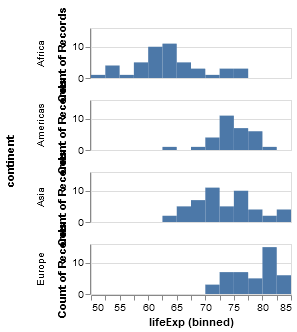

In [37]:
# distribution of life expectancy

alt.Chart(df).mark_rect().encode(
    x = alt.X('lifeExp:Q', bin = alt.Bin(step = 2.5)),
    row = 'continent',
    y = alt.Y('count()')
).properties(height = 50, width = 200)

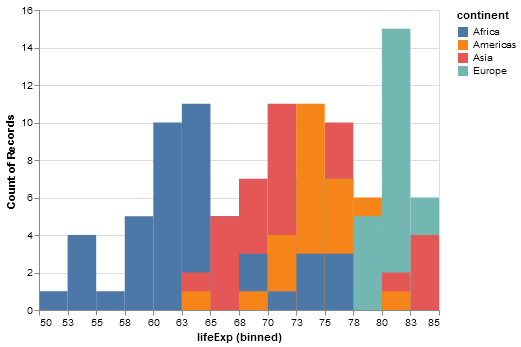

In [38]:
# distribution of life expectancy by continent (colored)

alt.Chart(df).mark_rect().encode(
    x = alt.X('lifeExp:Q', bin = alt.Bin(step = 2.5)),
    y = alt.Y('count()'),
    color = alt.Color('continent:N')
)

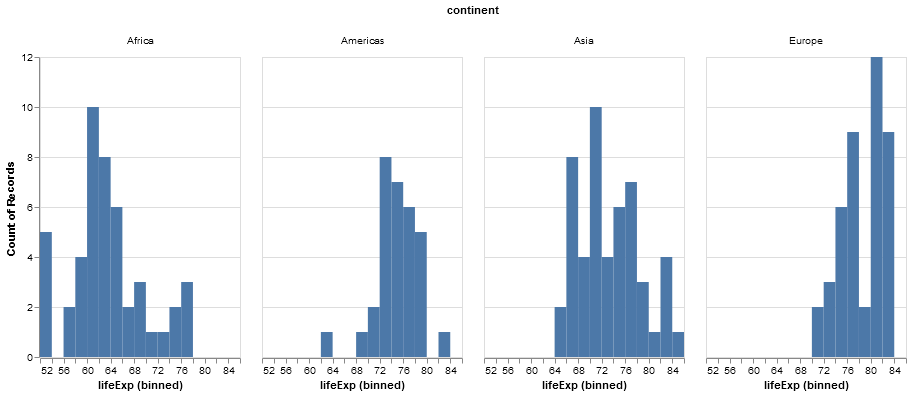

In [39]:
# distribution of life expectancy by continent (faceted)

alt.Chart(df).mark_rect().encode(
    x = alt.X('lifeExp:Q', bin = alt.Bin(step = 2)),
    y = alt.Y('count()'),
    column = alt.Color('continent:N')
).properties(width = 200)

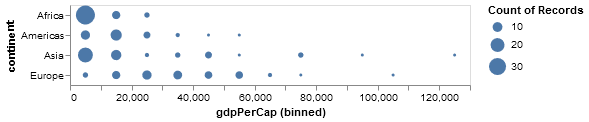

In [40]:
# GDP per capita distribution by continent

alt.Chart(df).mark_circle().encode(
    x = alt.X('gdpPerCap:Q', bin = alt.Bin(step = 10000)),
    y = alt.Y('continent:N'),
    size = alt.Size('count()')
)

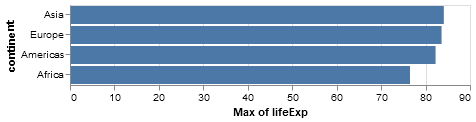

In [41]:
# Average life expectancy by continent

alt.Chart(df).mark_bar().encode(
    x = alt.X('lifeExp:Q',  aggregate='max'),
    y = alt.Y('continent:N', 
              sort = alt.Sort(field = 'lifeExp', op = 'max', order = 'descending'))
)

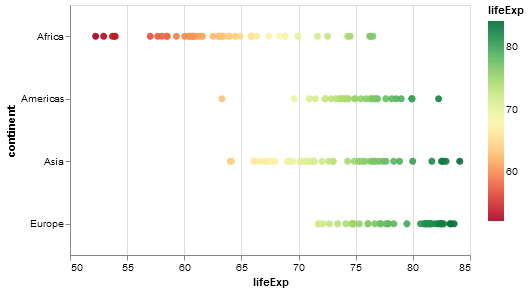

In [42]:
# Life expectancy by country and continent

alt.Chart(df).mark_circle(size = 50, opacity = 0.9).encode(
    x = alt.X('lifeExp:Q', scale = alt.Scale(zero = False)),
    y = alt.Y('continent:N'),
    color = alt.Color('lifeExp:Q', scale = alt.Scale(scheme = 'redyellowgreen')),
    tooltip = alt.Tooltip('country')
).properties(height = 250)

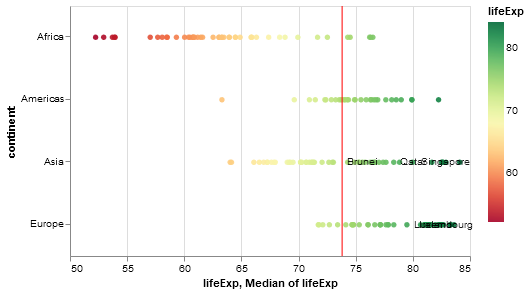

In [43]:
# Life expectancy by country compared to continent's average

base_plot = alt.Chart(df).mark_circle(size = 30, opacity = 0.9).encode(
    x = alt.X('lifeExp:Q', scale = alt.Scale(zero = False)),
    color = alt.Color('lifeExp:Q', scale = alt.Scale(scheme = 'redyellowgreen')),
    y = alt.Y('continent:N')
).properties(height = 250)

rules = alt.Chart(df).mark_rule(width = 50, color = 'red').encode(
    x = alt.X('lifeExp:Q', aggregate='median')
)

lines = alt.Chart(df).mark_rule(width = 50, color = 'red').encode(
    x = alt.X('lifeExp:Q', aggregate='median'),
    y = alt.Y('continent:N')
)

text = alt.Chart(df).mark_text(size = 10, opacity = 0.9).encode(
    x = alt.X('lifeExp:Q', scale = alt.Scale(zero = False)),
    y = alt.Y('continent:N'),
    text = alt.Text('country')
).properties(height = 250).transform_filter('datum.gdpPerCap > 75000')

base_plot + lines + rules + text

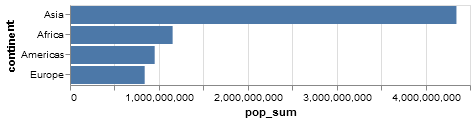

In [44]:
# Population summarized by continent

alt.Chart(df).mark_bar().encode(
    y=alt.Y('continent:N', sort = alt.Sort(field = 'pop_sum', order = 'descending')),
    x=alt.X('pop_sum:Q')
).transform_aggregate(
    pop_sum = 'sum(pop)',
    groupby=["continent"]
)

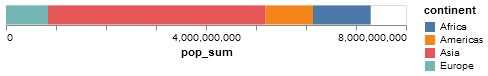

In [45]:
# Population summarized by continent

alt.Chart(df).mark_bar().encode(
    color=alt.Color('continent:N'),
    x=alt.X('pop_sum:Q')
).transform_aggregate(
    pop_sum = 'sum(pop)',
    groupby=["continent"]
)

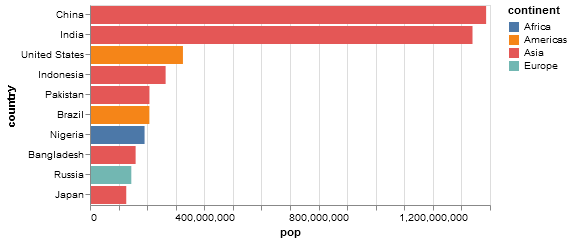

In [46]:
# Top 20 countries by population

alt.Chart(df).mark_bar().encode(
    y=alt.Y('country:N', sort = alt.Sort(field = 'pop', order = 'descending')),
    x=alt.X('pop:Q'),
    color = alt.Color('continent:N')
).transform_window(
    sort=[{'field': 'pop', 'order': 'descending'}],
    rank='row_number()',
).transform_filter(
    'datum.rank <= 10'
)

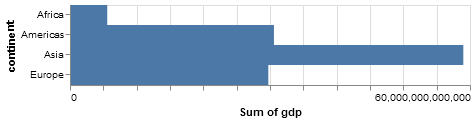

In [47]:
# GDP (not GDP per capita) by continent (do not use pandas to calculate it)


alt.Chart(df).mark_rect().encode(
    x = alt.X('gdp:Q', aggregate = 'sum'),
    y = alt.Y('continent')

).transform_calculate(gdp = 'datum.pop * datum.gdpPerCap')

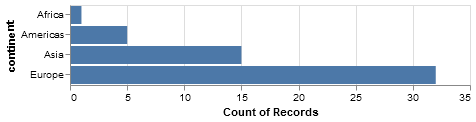

In [48]:
# Number of countries with GDP per capita > 25000 by continent (do not use pandas for filtering)

alt.Chart(df).mark_bar().encode(
    x = alt.X('count()'),
    y = alt.Y('continent')

).transform_filter('datum.gdpPerCap > 25000')


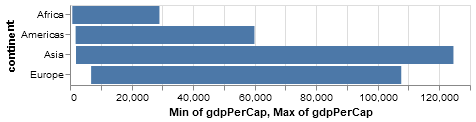

In [49]:
# Range of GDP per capita (min and max) by continent (do not use pandas for aggregation)

alt.Chart(df).mark_bar().encode(
    y = alt.Y('continent'),
    x = alt.X('gdpPerCap', aggregate = 'min'),
    x2 = alt.X2('max(gdpPerCap)')
)